Instalación de dependencias

In [0]:
!pip install yfinance
!pip install stockstats

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=6c9701f7bcb7554fbe223f8b68289083f87f6cdb8c238e0608a0454d326a7684
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


Importación de dependencias

In [0]:
import yfinance as yf
import matplotlib.pyplot as plt
from stockstats import StockDataFrame as sdf

Descarga data

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed
AVG subprime: -64.55085558034722
AVG covid: -58.75376721990723


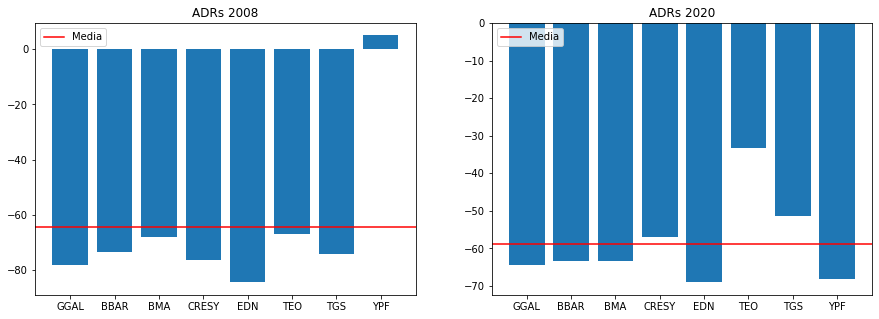

In [0]:
tickers = ['GGAL', 'BBAR', 'BMA', 'CRESY', 'EDN', 'TEO', 'TGS', 'YPF']

subprime = yf.download(tickers=' '.join(tickers), interval='1d', start='2007-10-27', end='2008-12-01', group_by='ticker')
covid = yf.download(tickers=' '.join(tickers), interval='1d', start='2019-08-12', end='2020-04-13', group_by='ticker')

dropsubprime = []
sumsubprime = 0
dropscovid = []
sumcovid = 0
for ticker in tickers:
  last_ticker_index = len(subprime[ticker])-1
  first_value = subprime[ticker].iloc[0]['High']
  last_value = subprime[ticker].iloc[last_ticker_index]['Low']
  diff = (last_value - first_value) / first_value * 100
  dropsubprime.append(diff)
  sumsubprime += diff

  last_ticker_index = len(covid[ticker])-1
  first_value = covid[ticker].iloc[0]['High']
  last_value = covid[ticker].iloc[last_ticker_index]['Low']
  diff = (last_value - first_value) / first_value * 100
  dropscovid.append(diff)
  sumcovid += diff

fig, (ax1, ax2) = plt.subplots(1,2)

avgsubprime = sumsubprime/len(tickers)
print('AVG subprime: ' + str(avgsubprime))
ax1.axhline(y=avgsubprime, c='r', label='Media')
ax1.bar(tickers, dropsubprime)
ax1.set_title('ADRs 2008')
ax1.legend(loc='upper left')

avgcovid = sumcovid/len(tickers)
print('AVG covid: ' + str(avgcovid))
ax2.axhline(y=avgcovid, c='red', label='Media')
ax2.bar(tickers, dropscovid)
ax2.set_title('ADRs 2020')
ax2.legend(loc = 'upper left')

fig.set_size_inches(15,5)

Comparativa entre la caida de los ADRs argentinos en la crisis de 2008 y la del 2020. En la pasada crisis hubo una baja promedio 8% más aproximadamente en los papeles GGAL BBAR BMA CRESY EDN TEO GS YPF

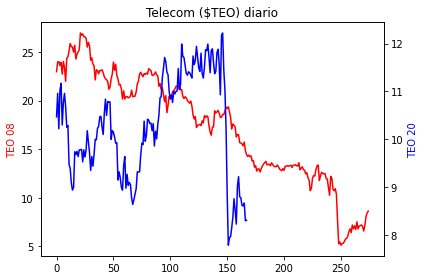

In [0]:
subprime['Index'] = range(0, len(subprime))
covid['Index'] = range(0, len(covid))

fig, ax1 = plt.subplots()
ax1.set_title('Telecom ($TEO) diario')
ax1.plot(subprime['Index'], subprime['TEO']['Close'], c='r')
ax1.set_ylabel('TEO 08', c='r')

ax2 = ax1.twinx()
ax2.plot(covid['Index'], covid['TEO']['Close'], c='b')
ax2.set_ylabel('TEO 20', c='b')

fig.tight_layout() 
plt.show()

Se destaca Telecom $TEO con menos de 30% de retroceso en 2020 y más del 60% en 2008

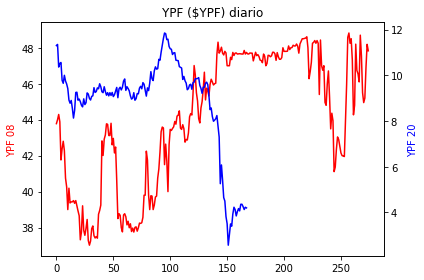

In [0]:
fig, ax1 = plt.subplots()
ax1.set_title('YPF ($YPF) diario')
ax1.plot(subprime['Index'], subprime['YPF']['Close'], c='r')
ax1.set_ylabel('YPF 08', c='r')

ax2 = ax1.twinx()
ax2.plot(covid['Index'], covid['YPF']['Close'], c='b')
ax2.set_ylabel('YPF 20', c='b')

fig.tight_layout() 
plt.show()

$YPF parece no haberse vista afectada en la crisis de 2008 desplazandose al alza, y llegando a la zona de USD 48. Mientras que en 2020 llegó a cotizar USD 2.25

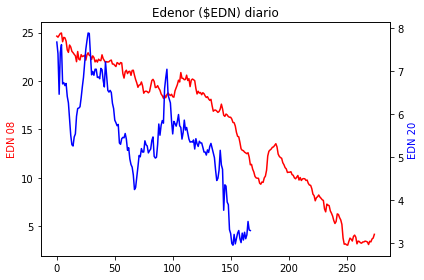

In [0]:
fig, ax1 = plt.subplots()
ax1.set_title('Edenor ($EDN) diario')
ax1.plot(subprime['Index'], subprime['EDN']['Close'], c='red')
ax1.set_ylabel('EDN 08', c='red')

ax2 = ax1.twinx()
ax2.plot(covid['Index'], covid['EDN']['Close'], c='blue')
ax2.set_ylabel('EDN 20', c='blue')

fig.tight_layout() 
plt.show()

$EDN parece ejecutar una estructura similar que la de 2008: dos swings alcistas y hacia el final una pequeña lateralización que concluye al alza.

[*********************100%***********************]  1 of 1 completed


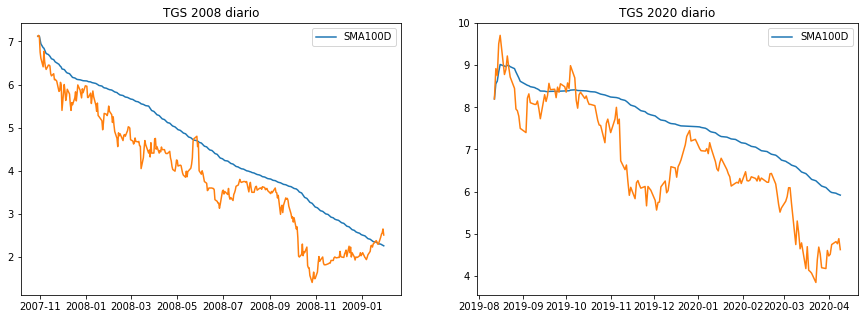

In [0]:
subprime = yf.download(tickers='TGS', interval='1d', start='2007-10-27', end='2009-01-31', group_by='ticker')

subprime_indicators = sdf.retype(subprime)
covid_indicators = sdf.retype(covid['TGS'])

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(subprime_indicators['close_100_sma'], label='SMA100D')
ax1.plot(subprime_indicators.close)
ax1.legend(loc='best')
ax1.set_title('TGS 2008 diario')

ax2.plot(covid_indicators['close_100_sma'], label='SMA100D')
ax2.plot(covid_indicators.close)
ax2.legend(loc='best')
ax2.set_title('TGS 2020 diario')

fig.set_size_inches(15,5)

El rango de precios de $TGS es similar, lo cual permite determinar que el cruce de la SMA de 100 días podría ser un buen indicador de fin de tendencia